In [1]:
import numpy as np 
from PIL import Image
import matplotlib.pyplot as plt 
import cv2

def imread(filename):
    return np.array(Image.open(filename)).astype('float')

def imget(filename):
    return Image.open(filename)

def imshow(img):
    plt.imshow(img.astype(np.uint8))

def draw_mask(img, points, alpha=0.95):
    # mask = np.ones(img.shape) * 255
    mask = np.zeros(img.shape)
    mask[points[:, 1], points[:, 0], :] = (0, 0, 255)
    mask *= alpha
    _img = mask + img
    _img = np.clip(_img, 0, 255)
    imshow(_img)

def pointspooling(points, dowscale=16):
    _points = points.copy()
    _points = _points / dowscale 
    _points = _points.astype("int")
    _points = _points * dowscale 
    return _points 

points_path = "./data/1701153900630209_front_wide.npy"
img_path = "./data/1701153900630209_front_wide_undist.jpg"
points = np.load(points_path)
img = imread(img_path)
print(img.shape, points[:, 0].max(), points[:, 1].max())
x, y = points[:, 1], points[:, 0]

(2160, 3840, 3) 3839 2159


In [4]:
from torchvision import datasets
import numpy as np
from matplotlib import pyplot as plt
from mmengine.structures import PixelData
from mmseg.structures import SegDataSample
ROOT = "/root/datasets/COCO" 
IMAGES_PATH = "/root/datasets/COCO/train2017"
ANNOTATIONS_PATH = "/root/datasets/COCO/annotations/instances_train2017.json" 
dataset = datasets.CocoDetection(IMAGES_PATH, ANNOTATIONS_PATH)
dataset = datasets.wrap_dataset_for_transforms_v2(dataset)

loading annotations into memory...
Done (t=15.79s)
creating index...
index created!


/usr/local/lib/python3.8/dist-packages/torchvision/datapoints/__init__.py:12: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please submit any feedback you may have in this issue: https://github.com/pytorch/vision/issues/6753, and you can also check out https://github.com/pytorch/vision/issues/7319 to learn more about the APIs that we suspect might involve future changes. You can silence this warning by calling torchvision.disable_beta_transforms_warning().
  warnings.warn(_BETA_TRANSFORMS_WARNING)
/usr/local/lib/python3.8/dist-packages/torchvision/transforms/v2/__init__.py:54: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please submit any feedback you may have in this issue: https://g

In [57]:
sample = dataset[0]
img, target = sample
sample = dataset[0]
img = sample[0]
masks = sample[1]['masks']
print("img shape & masks shape: ", np.array(img).shape, masks.shape)
print(type(masks.data))


img shape & masks shape:  (480, 640, 3) torch.Size([8, 480, 640])
<class 'torch.Tensor'>


In [78]:
target['labels']

tensor([51, 51, 56, 51, 55, 55, 55, 55])

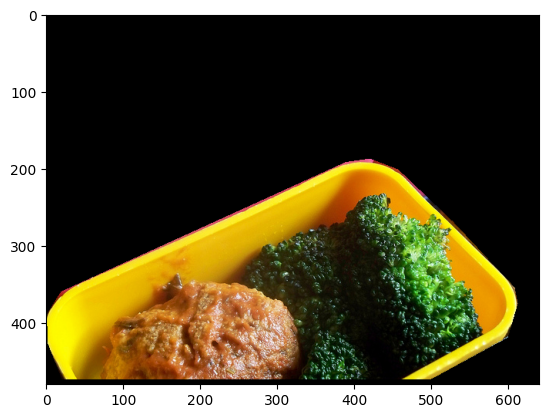

In [75]:
mask = masks.data[0]
mask = mask.reshape((mask.shape[0], mask.shape[1], 1))
mask = mask.repeat((1,1,3))
plt.imshow(np.array(img) * mask.numpy())

In [80]:
import pycocotools
from pycocotools.coco import COCO
annFile = ANNOTATIONS_PATH 
coco=COCO(annFile)

loading annotations into memory...
Done (t=18.77s)
creating index...
index created!


In [97]:
coco.loadImgs(coco.getImgIds(catIds=[90])[:3]), coco.loadCats([90])

([{'license': 1,
   'file_name': '000000354306.jpg',
   'coco_url': 'http://images.cocodataset.org/train2017/000000354306.jpg',
   'height': 640,
   'width': 426,
   'date_captured': '2013-11-15 03:10:38',
   'flickr_url': 'http://farm8.staticflickr.com/7062/6893143985_fe0c0ed081_z.jpg',
   'id': 354306},
  {'license': 2,
   'file_name': '000000204804.jpg',
   'coco_url': 'http://images.cocodataset.org/train2017/000000204804.jpg',
   'height': 427,
   'width': 640,
   'date_captured': '2013-11-15 03:19:29',
   'flickr_url': 'http://farm8.staticflickr.com/7055/6945089703_393d186894_z.jpg',
   'id': 204804},
  {'license': 5,
   'file_name': '000000464902.jpg',
   'coco_url': 'http://images.cocodataset.org/train2017/000000464902.jpg',
   'height': 480,
   'width': 640,
   'date_captured': '2013-11-21 19:53:15',
   'flickr_url': 'http://farm2.staticflickr.com/1425/929688150_13f9f1efe3_z.jpg',
   'id': 464902}],
 [{'supercategory': 'indoor', 'id': 90, 'name': 'toothbrush'}])

(mask[0] > 0).shape

In [116]:
imgIds = coco.getImgIds(catIds=[90])[:3]
annIds = coco.getAnnIds(imgIds=imgIds, catIds=[90], iscrowd=None)
anns = coco.loadAnns(annIds)

In [117]:
[ann['image_id'] for ann in anns]

[354306, 354306, 204804, 204804, 464902, 464902, 464902, 464902, 464902]

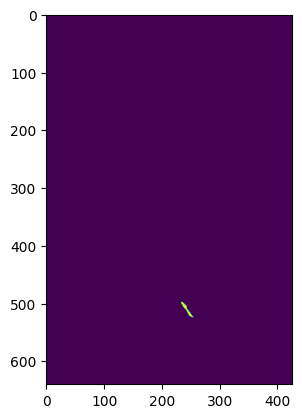

In [111]:
mask = coco.annToMask(anns[0])
img_id = anns[0]['image_id']
# for i in range(len(anns)):
#     if anns[i]['image_id'] == img_id:
#         mask += coco.annToMask(anns[i])
plt.imshow(mask)

In [113]:
import pycocotools
from pycocotools.coco import COCO
import io 

annFile = ANNOTATIONS_PATH 
coco=COCO(annFile)

class COCOPrompter(object):
    def __init__(self, annFile, shot=5):
        self.coco = COCO(annFile) 
        self.shot = shot
    
    def create_buffer(self, catId):
        setattr(self, )
    def prompt(self, catIds):
        

1

In [14]:
import pycocotools
from pycocotools.coco import COCO
import io 

annFile = ANNOTATIONS_PATH 
coco=COCO(annFile)

class COCOPrompter(object):
    def __init__(self, annFile, shot=5):
        self.coco = COCO(annFile) 
        self.shot = shot

    def create_buffer(self, catId):
        buffer_name = 'buffer_{}'.format(catId)
        if hasattr(self, buffer_name):
            return 
        setattr(self, buffer_name, io.BytesIO())
    def prompt(self, catIds):

        

[array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]]),
 array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]]),
 array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, Fal

In [1]:
import io
from PIL import Image
from collections import deque

class ImageBuffer:
    def __init__(self):
        self.buffer = io.BytesIO()
        self.image_queue = deque(maxlen=5)

    def add_image(self, image):
        image.save(self.buffer, format='JPEG')
        self.image_queue.append(self.buffer.getvalue())
        self.buffer.seek(0)
        self.buffer.truncate()

    def get_images(self):
        return list(self.image_queue)

# 示例用法
my_image_buffer = ImageBuffer()

# 假设有一组名为 'image1.jpg', 'image2.jpg', 'image3.jpg', 'image4.jpg', 'image5.jpg', 'image6.jpg' 的图片
image_paths = ['image1.jpg', 'image2.jpg', 'image3.jpg', 'image4.jpg', 'image5.jpg', 'image6.jpg']

for path in image_paths:
    image = Image.open(path)
    my_image_buffer.add_image(image)

buffered_images = my_image_buffer.get_images()

# 打印缓冲区中的图片数量
print(len(buffered_images))  # 输出: 5

NameError: name 'masks' is not defined

In [47]:
masks[0].shape

torch.Size([480, 640])

In [2]:
# input_point.shape

NameError: name 'input_point' is not defined

In [12]:
input_point = np.array([[500, 375]])
input_label = np.array([1])

127
dict_keys(['segmentation', 'area', 'bbox', 'predicted_iou', 'point_coords', 'stability_score', 'crop_box'])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


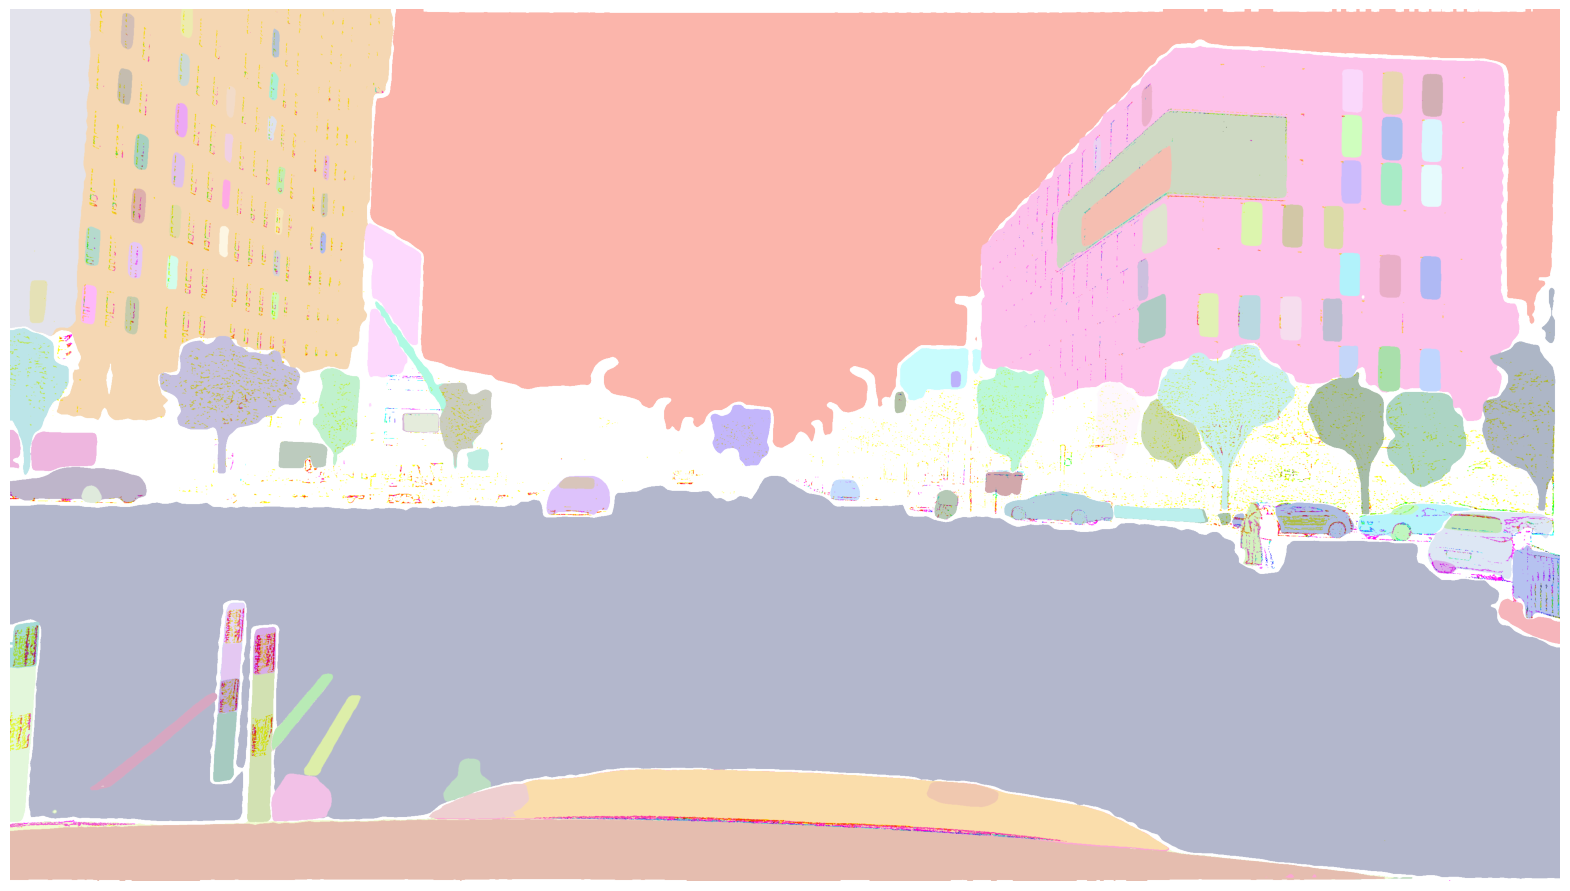